In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [2]:
import joblib

In [3]:
set_config(transform_output="pandas")

In [4]:
# data and model paths

data_path = "../data/interim/df_without_outliers.csv"

kmeans_path = "../models/mb_kmeans.joblib"
scaler_path = "../models/scaler.joblib"
encoder_path = "../models/encoder.joblib"
model_path = "../models/model.joblib"

In [5]:
# load the data

df = pd.read_csv(data_path, usecols=["pickup_longitude","pickup_latitude"])

df.shape

(33234199, 2)

In [6]:
# load the scaler and model

scaler = joblib.load(scaler_path)
kmeans = joblib.load(kmeans_path)

In [7]:
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [8]:
kmeans

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.",30
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:'k-means++' : selects initial cluster centroids using sampling based onan empirical probability distribution of the points' contribution to theoverall inertia. This technique speeds up convergence. The algorithmimplemented is ""greedy k-means++"". It differs from the vanilla k-means++by making several trials at each sampling step and choosing the best centroidamong them.'random': choose `n_clusters` observations (rows) at random from datafor the initial centroids.If an array is passed, it should be of shape (n_clusters, n_features)and gives the initial centers.If a callable is passed, it should take arguments X, n_clusters and arandom state and return an initialization.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"max_iter max_iter: int, default=100Maximum number of iterations over the complete dataset beforestopping independently of any early stopping criterion heuristics.",100
,"batch_size batch_size: int, default=1024Size of the mini batches.For faster computations, you can set `batch_size > 256 * number_of_cores`to enable :ref:`parallelism `on all cores... versionchanged:: 1.0 `batch_size` default changed from 100 to 1024.",1024
,"verbose verbose: int, default=0Verbosity mode.",0
,"compute_labels compute_labels: bool, default=TrueCompute label assignment and inertia for the complete datasetonce the minibatch optimization has converged in fit.",True
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization andrandom reassignment. Use an int to make the randomness deterministic.See :term:`Glossary `.",42
,"tol tol: float, default=0.0Control early stopping based on the relative center changes asmeasured by a smoothed, variance-normalized of the mean centersquared position changes. This early stopping heuristics iscloser to the one used for the batch variant of the algorithmsbut induces a slight computational and memory overhead over theinertia heuristic.To disable convergence detection based on normalized centerchange, set tol to 0.0 (default).",0.0
,"max_no_improvement max_no_improvement: int, default=10Control early stopping based on the consecutive number of minibatches that does not yield an improvement on the smoothed inertia.To disable convergence detection based on inertia, setmax_no_improvement to None.",10
,"init_size init_size: int, default=NoneNumber of samples to randomly sample for speeding up theinitialization (sometimes at the expense of accuracy): theonly algorithm is initialized by running a batch KMeans on arandom subset of the data. This needs to be larger than n_clusters.If `None`, the heuristic is `init_size = 3 * batch_size` if`3 * batch_size < n_clusters`, else `init_size = 3 * n_clusters`.",None
,"n_init n_init: 'auto' or int, default=""auto""Number of random initializations that are tried.In contrast to KMeans, the algorithm is only run once, using the best ofthe `n_init` initializations as measured by inertia. Several runs arerecommended for sparse high-dimensional problems (see:ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:3 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'` in version.",10


In [9]:
# scale the input data

df_scaled = scaler.transform(df)

df_scaled.head()

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533


In [10]:
# get the cluster predictions

predictions = kmeans.predict(df_scaled)

c:\Users\mukti\Desktop\UBER-DEMAND-PREDICTION\uber\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [14]:
# add the predictions to data

df['region'] = predictions

df

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,7
1,-73.980782,40.729912,26
2,-73.984550,40.679565,9
3,-73.993469,40.718990,10
4,-73.960625,40.781330,8
...,...,...,...
33234194,-73.790565,40.644451,3
33234195,-73.788055,40.641483,3
33234196,-73.789154,40.646736,3
33234197,-73.977356,40.774471,19


In [12]:
# form a region grp

region_grp = df.groupby("region")

In [ ]:
# sample the data from each region 500 from each 30 region

sampled_data = (
    region_grp
    .sample(500, random_state=42)
)

In [16]:
sampled_data.shape

(15000, 3)

In [17]:
sampled_data

,pickup_longitude,pickup_latitude,region
3269108,-73.961357,40.806641,0
31107559,-73.949677,40.801151,0
4464996,-73.954544,40.805717,0
27828548,-73.960274,40.813190,0
9889390,-73.962280,40.805012,0
...,...,...,...
36922,-73.945114,40.745949,29
5793772,-73.943207,40.753162,29
5042014,-73.945404,40.745926,29
31688583,-73.936272,40.750038,29


In [18]:
# value counts

sampled_data["region"].value_counts()

region
0     500
1     500
28    500
27    500
26    500
25    500
24    500
23    500
22    500
21    500
20    500
19    500
18    500
17    500
16    500
15    500
14    500
13    500
12    500
11    500
10    500
9     500
8     500
7     500
6     500
5     500
4     500
3     500
2     500
29    500
Name: count, dtype: int64

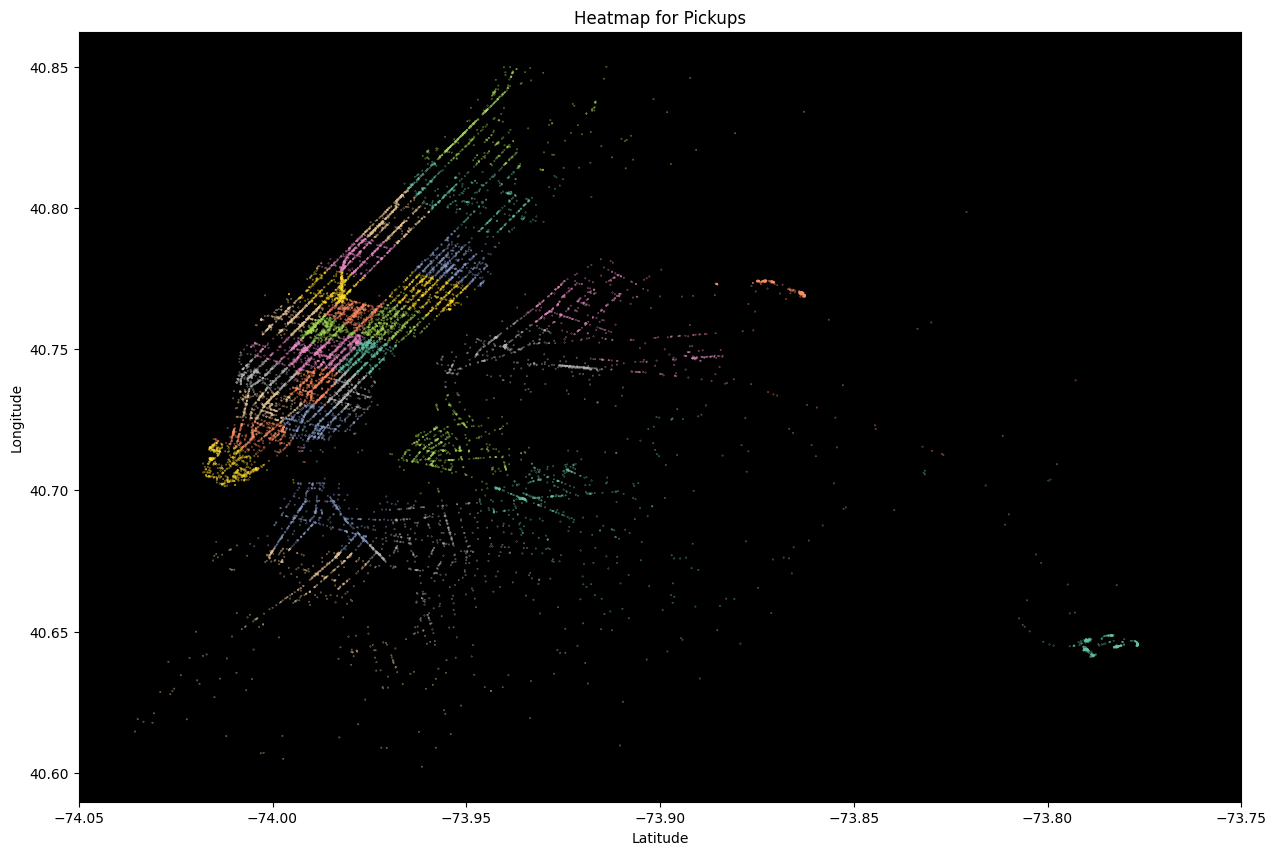

In [19]:
# plot the sampled data on scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,10))

ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)

ax.scatter(sampled_data['pickup_longitude'],sampled_data['pickup_latitude'],
           s=0.05,c=sampled_data['region'],cmap="Set2")
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [21]:
# save the sampled data

save_path = "../data/external/plot_data.csv"

sampled_data.to_csv(save_path, index=False)

In [22]:
# load the test data

data_path = "../data/processed/test.csv"

test_df = pd.read_csv(data_path, parse_dates=["tpep_pickup_datetime"]).set_index("tpep_pickup_datetime")

test_df

,lag_1,lag_2,lag_3,lag_4,region,total_pickups,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,,
2016-03-01 00:00:00,36.0,44.0,31.0,29.0,0,41,39.0,1
2016-03-01 00:15:00,41.0,36.0,44.0,31.0,0,35,37.0,1
2016-03-01 00:30:00,35.0,41.0,36.0,44.0,0,47,41.0,1
2016-03-01 00:45:00,47.0,35.0,41.0,36.0,0,34,38.0,1
2016-03-01 01:00:00,34.0,47.0,35.0,41.0,0,30,35.0,1
...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,22.0,14.0,15.0,13.0,29,14,16.0,3
2016-03-31 23:00:00,14.0,22.0,14.0,15.0,29,17,16.0,3
2016-03-31 23:15:00,17.0,14.0,22.0,14.0,29,18,17.0,3


In [23]:
# split the data

X_test = test_df.drop(columns=["total_pickups"])
y_test = test_df["total_pickups"]

X_test

,lag_1,lag_2,lag_3,lag_4,region,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,
2016-03-01 00:00:00,36.0,44.0,31.0,29.0,0,39.0,1
2016-03-01 00:15:00,41.0,36.0,44.0,31.0,0,37.0,1
2016-03-01 00:30:00,35.0,41.0,36.0,44.0,0,41.0,1
2016-03-01 00:45:00,47.0,35.0,41.0,36.0,0,38.0,1
2016-03-01 01:00:00,34.0,47.0,35.0,41.0,0,35.0,1
...,...,...,...,...,...,...,...
2016-03-31 22:45:00,22.0,14.0,15.0,13.0,29,16.0,3
2016-03-31 23:00:00,14.0,22.0,14.0,15.0,29,16.0,3
2016-03-31 23:15:00,17.0,14.0,22.0,14.0,29,17.0,3


In [25]:
encoder = joblib.load(encoder_path)

model = joblib.load(model_path)

In [26]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("encoder", encoder),
    ("model",model)
])

pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('encoder', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spars

In [27]:
encoder

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. ``""{featu

In [28]:
# get the predictions

predictions = pipe.predict(X_test)

In [29]:
# sample row

sample_row = sampled_data.sample(1)

In [30]:
sample_row

,pickup_longitude,pickup_latitude,region
11701167,-73.9991,40.688435,9


In [31]:
# scale the coords

scaled_coords = scaler.transform(sample_row.iloc[:,0:2])

scaled_coords

,pickup_longitude,pickup_latitude
11701167,-0.68126,-2.300898


In [32]:
# calculate the distances from centroids

distances = kmeans.transform(scaled_coords).values.ravel().tolist()

c:\Users\mukti\Desktop\UBER-DEMAND-PREDICTION\uber\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [33]:
distances = list(enumerate(distances))

distances

[(0, 4.44981885289202),
 (1, 2.244257457543708),
 (2, 2.1481162816335306),
 (3, 6.0311739922948355),
 (4, 1.14498057119908),
 (5, 2.7765632384676056),
 (6, 4.656893756651741),
 (7, 1.7954059700881135),
 (8, 3.5940070351249784),
 (9, 0.3554531717299699),
 (10, 1.3285702707138738),
 (11, 3.5109107756250153),
 (12, 2.2152433585221867),
 (13, 3.467055759197904),
 (14, 2.2955337184632274),
 (15, 2.530623345392738),
 (16, 1.5546882766696175),
 (17, 5.308434412370586),
 (18, 2.712006052073926),
 (19, 3.0588094164767305),
 (20, 0.8302765314214061),
 (21, 3.1675212831756356),
 (22, 1.538184257828847),
 (23, 4.009402492257642),
 (24, 0.8170946993550448),
 (25, 2.6553238295210235),
 (26, 1.8014901584945864),
 (27, 1.91424266452526),
 (28, 1.163679375489073),
 (29, 2.7648556761141294)]

In [34]:
# sort the distances

indexes = [ind[0] for ind in sorted(distances, key=lambda x: x[1])][0:9]

indexes

[9, 24, 20, 4, 28, 10, 22, 16, 7]